In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
# Read the csv file into a pandas DataFrame

nat_mean_salary = pd.read_csv('National_Industry_Mean_Salary.csv')
nat_mean_salary.head()

,Year,Number of workers (Total),Median weekly earnings (Total),Number of workers (Men),Median weekly earnings (Men),Number of workers (Women),Median weekly earnings (Women)
0,2019,629,"1,984",439,"2,019",190,"1,892"
1,2018,601,"1,877",448,"1,920",153,"1,727"
2,2017,594,"1,843",428,"1,897",165,"1,629"
3,2016,592,"1,738",443,"1,756",150,"1,680"
4,2015,636,"1,728",466,"1,817",169,"1,563"


In [49]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
nat_gender_gap = pd.get_dummies(nat_gender_gap)
nat_gender_gap.head()
### END SOLUTION

,Women (current dollars),Quarter_Q1 2000,Quarter_Q1 2001,Quarter_Q1 2002,Quarter_Q1 2003,Quarter_Q1 2004,Quarter_Q1 2005,Quarter_Q1 2006,Quarter_Q1 2007,Quarter_Q1 2008,...,Men (current dollars)_917,Men (current dollars)_924,Men (current dollars)_939,Men (current dollars)_940,Men (current dollars)_943,Men (current dollars)_955,Men (current dollars)_964,Men (current dollars)_980,Men (current dollars)_991,Men (current dollars)_994
0,485.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,490.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,497.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,501.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,504.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = nat_mean_salary[['Number of workers (Total)', 'Number of workers (Men)', 'Number of workers (Women)']]
y = nat_mean_salary["Year"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(17, 3) (17, 1)


In [51]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [52]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [53]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [54]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

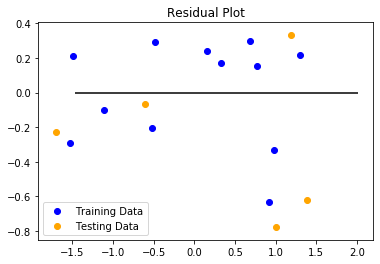

In [55]:

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2321070852667074, R2: 0.8712058637707997


In [57]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.25503854124887865, R2: 0.8584814048758549


In [58]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2478264137525875, R2: 0.862483349625591


In [59]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2500737248622107, R2: 0.8612363368820136
